In [129]:
import numpy as np
import pandas as pd
# load mat file
import scipy

In [130]:
mat = scipy.io.loadmat('datasets/irmdata/uml.mat')
d = mat['Rs']
d.shape

(135, 135, 49)

In [149]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
import sys

sys.path.append("/Users/aleix11alcacer/Projects/archetypes")

In [152]:
from models import NAA, NSBM
from models import BiAA, DBiAA
import torch

In [165]:
data = torch.tensor(d).float().reshape(d.shape)

model = NSBM((16, 16, 21), d.shape, relations=[0, 0, 1], degree_correction=False, loss="bernoulli")

model.fit(data, n_epochs=2_000, learning_rate=0.05)

  0%|          | 0/2000 [00:00<?, ?it/s]

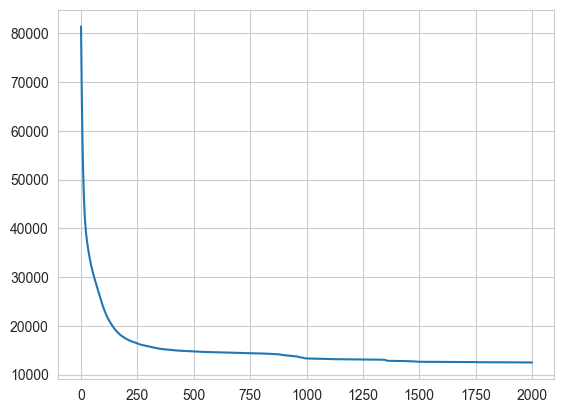

In [155]:
import matplotlib.pyplot as plt

plt.plot(model.losses)
plt.show()

In [156]:
from archetypes.visualization import heatmap
from archetypes.datasets import sort_by_archetype_similarity

In [157]:
alphas = [a.detach().numpy() for a in model.A]
estimated_archetypes = model.Z.detach().numpy()

_, info_s = sort_by_archetype_similarity(data[0, :, :], alphas[1:3], estimated_archetypes[0, :, :])

In [158]:
gnames = np.array([str(*g) for g in mat["gnames"][0]])[info_s["perms"][0]]
names = np.array([str(*n[0]) for n in mat["names"]])[info_s["perms"][0]]
labels = info_s["labels"][0]
scores = info_s["scores"][0]

df = pd.DataFrame({"gname": gnames, "name": names, "label": labels, "score": scores})

In [159]:
df_g = df.groupby("label")
for _, df_i in df_g:
    c = df_i.groupby("gname").count()
    print(df_i.name[df_i.score > 0.5].head(5))
    

0              Intellectual_Product
1             Occupational_Activity
2    Daily_or_Recreational_Activity
3                 Regulation_or_Law
4                   Spatial_Concept
Name: name, dtype: object
27                                      Hormone
28                                     Receptor
29                                       Enzyme
30             Hazardous_or_Poisonous_Substance
31    Neuroreactive_Substance_or_Biogenic_Amine
Name: name, dtype: object
54             Physiologic_Function
55                    Cell_Function
56    Cell_or_Molecular_Dysfunction
57         Organ_or_Tissue_Function
58              Disease_or_Syndrome
Name: name, dtype: object
72       Bacterium
73           Plant
74       Amphibian
75    Invertebrate
76          Animal
Name: name, dtype: object
89    Body_Part,_Organ,_or_Organ_Component
90       Fully_Formed_Anatomical_Structure
91                     Embryonic_Structure
92                          Gene_or_Genome
93                           

In [160]:
relnames = np.array([str(*g[0]) for g in mat["relnames"]])[info_s["perms"][1]]
labels = info_s["labels"][1]
scores = info_s["scores"][1]
df = pd.DataFrame({"relname": relnames, "label": labels, "score": scores})


In [161]:
for _, df_i in df.groupby("label"):
    c = df_i.groupby("relname").count()
    print(df_i)

                  relname  label     score
0      conceptual_part_of      0  0.999996
1               surrounds      0  0.999960
2   developmental_form_of      0  0.999957
3           ingredient_of      0  0.999941
4             carries_out      0  0.999930
5                contains      0  0.999923
6           interconnects      0  0.999900
7             adjacent_to      0  0.999878
8               branch_of      0  0.999820
9               traverses      0  0.999789
10           connected_to      0  0.999751
11           tributary_of      0  0.999569
12          derivative_of      0  0.999519
13              practices      0  0.999291
14            consists_of      0  0.827438
            relname  label     score
15    evaluation_of      1  0.999991
16         prevents      1  0.999965
17           treats      1  0.999953
18        indicates      1  0.943463
19        diagnoses      1  0.708334
20   measurement_of      1  0.680585
21  associated_with      1  0.627139
                

/Users/aleix11alcacer/Projects/archetypes/archetypes/visualization/heatmap.py:113: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(
/Users/aleix11alcacer/Projects/archetypes/archetypes/visualization/heatmap.py:132: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(


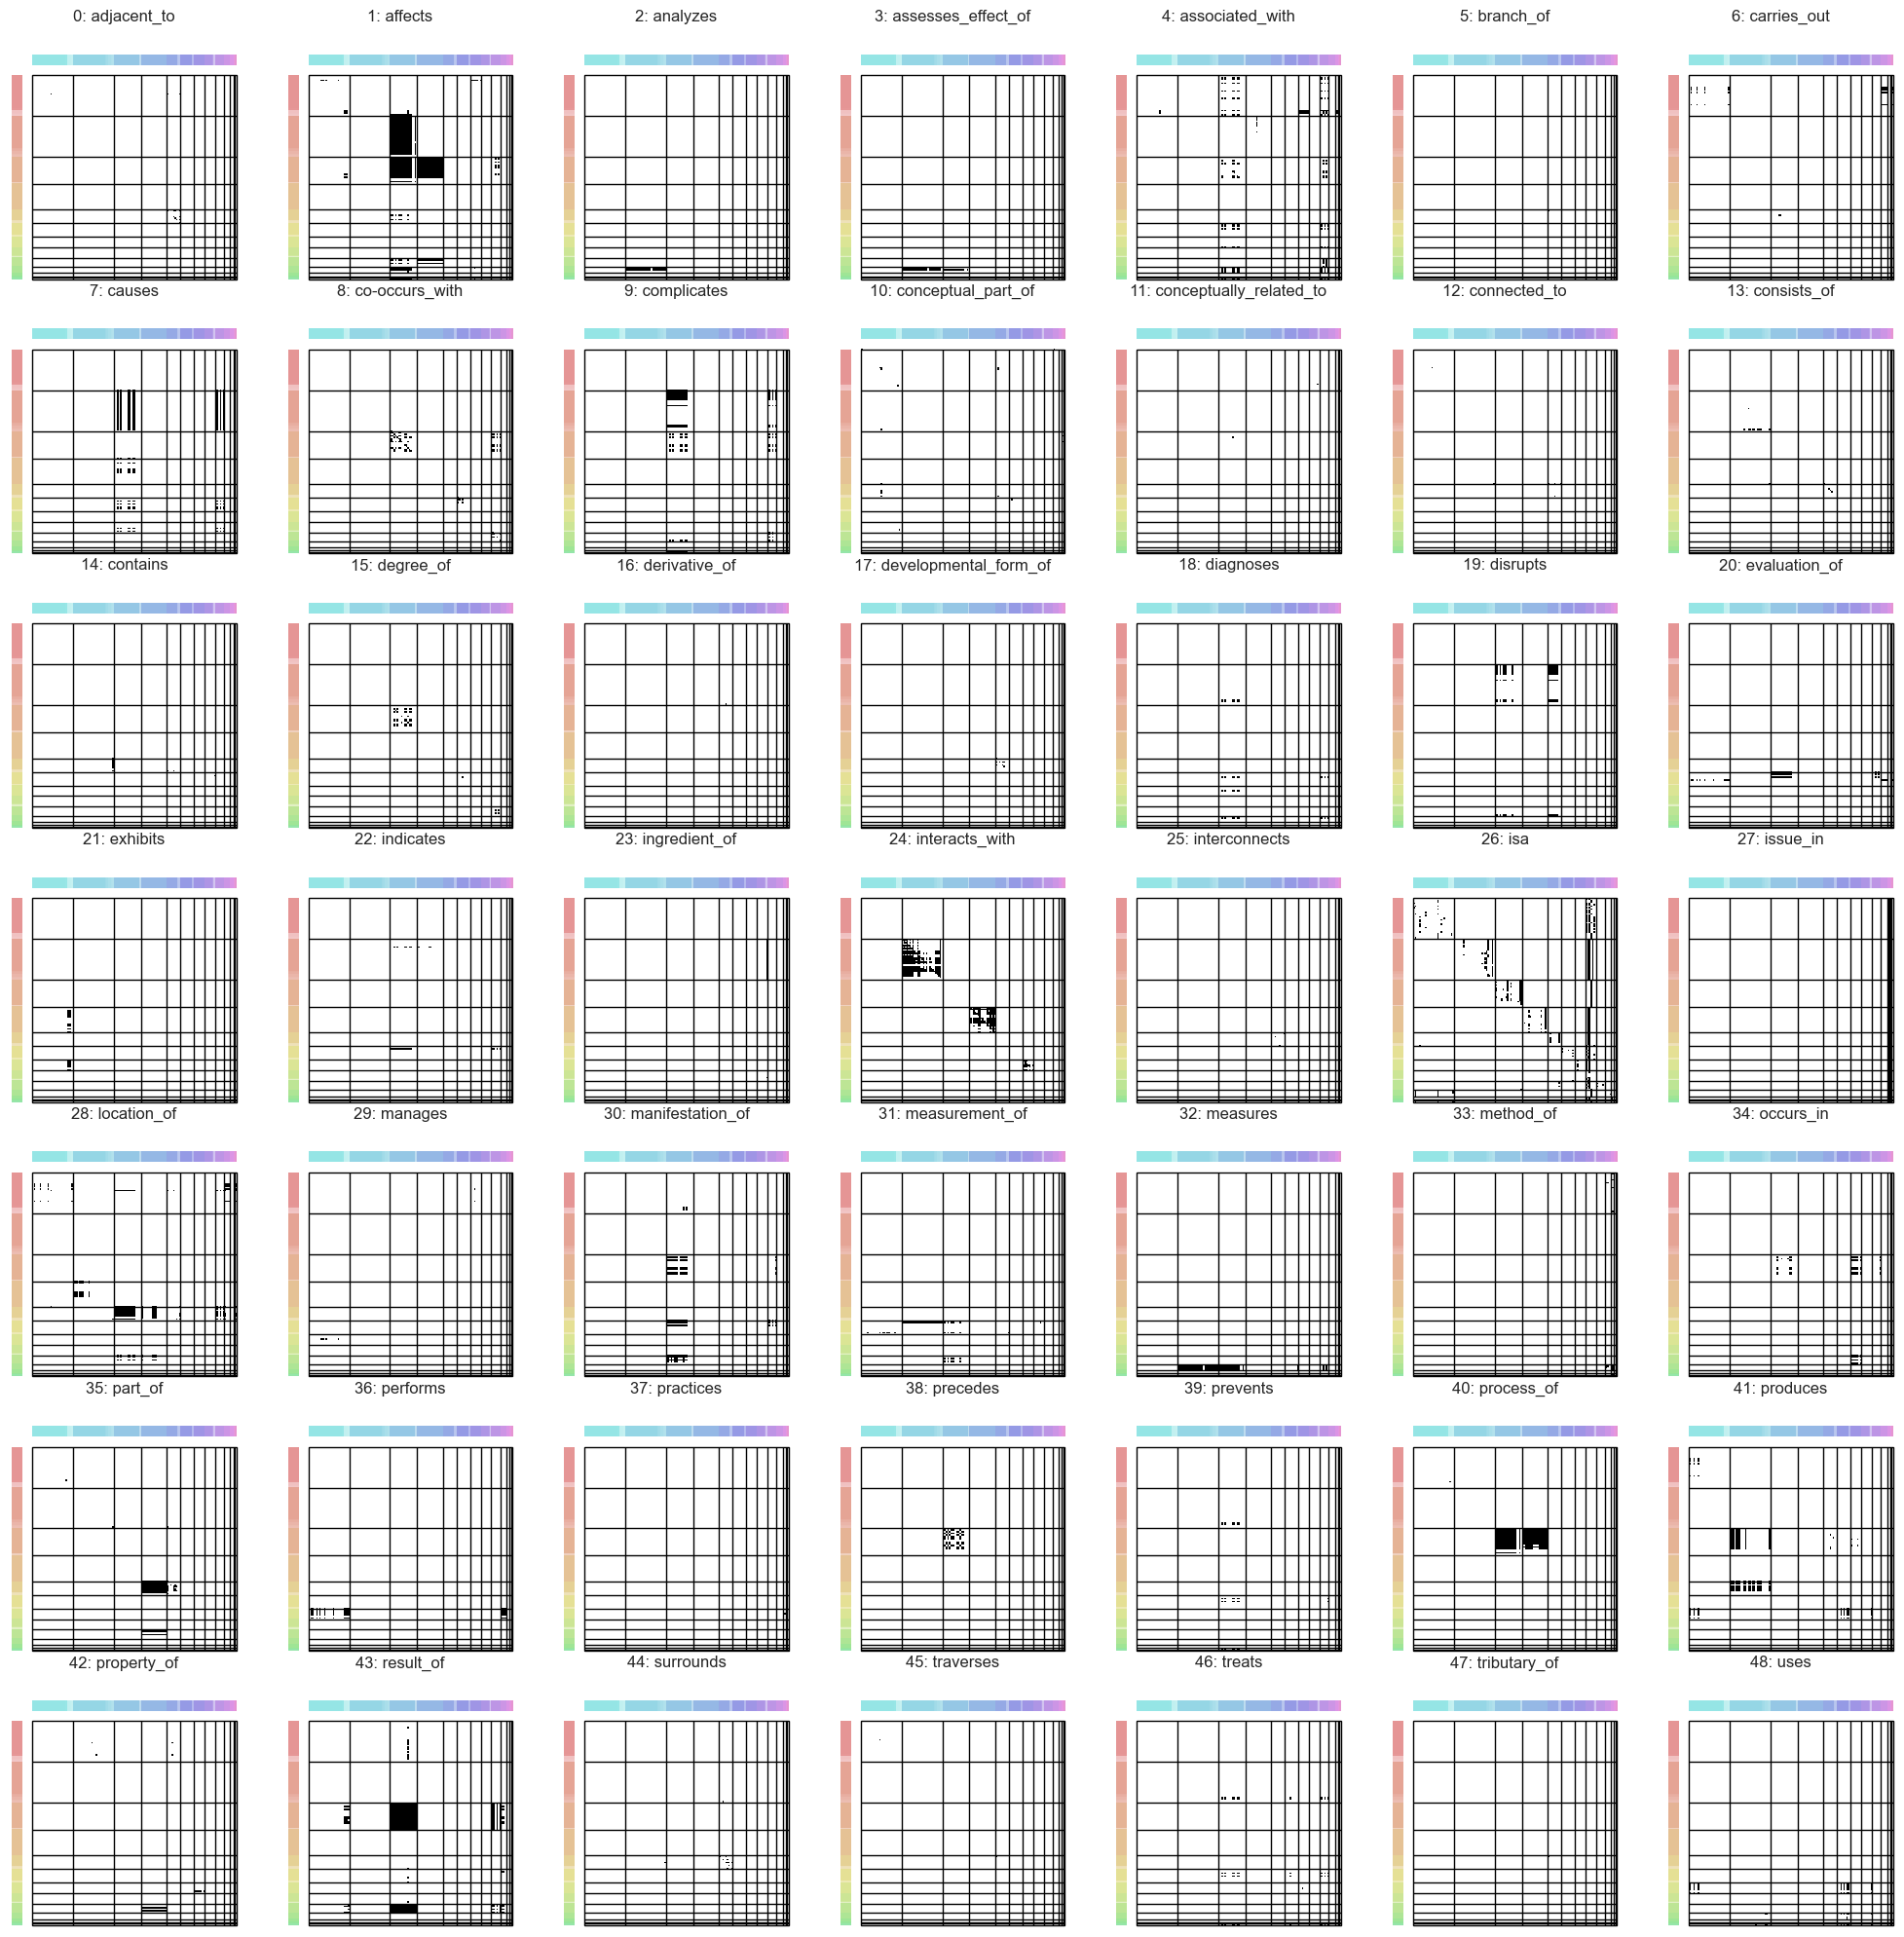

In [162]:
fig, axs = plt.subplots(7, 7, figsize=(25, 25))


for i, ax in enumerate(axs.flatten()):
    data_s, info_s = sort_by_archetype_similarity(data[:, :, i], alphas[:2], estimated_archetypes[:, :, 0])
    heatmap(data_s, info_s["labels"], info_s["n_archetypes"], info_s["scores"], ax=ax)
    ax.set_title(f"{i}: {mat['relnames'][i][0][0]}")

# fig.savefig("figures/irmdata/alyawarra/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

/Users/aleix11alcacer/Projects/archetypes/archetypes/visualization/heatmap.py:113: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.imshow(
/Users/aleix11alcacer/Projects/archetypes/archetypes/visualization/heatmap.py:132: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.imshow(


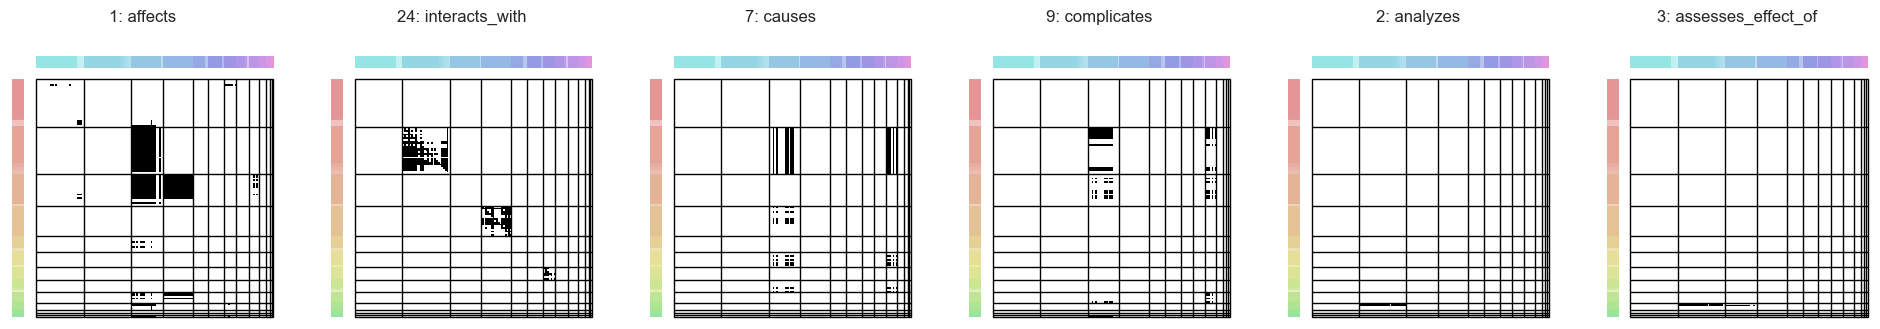

In [163]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))

rels = [1, 24, 7, 9, 2, 3]
for i, ax in enumerate(axs.flatten()):
    j = rels[i]
    data_s, info_s = sort_by_archetype_similarity(data[:, :, j], alphas[:2], estimated_archetypes[:, :, 0])
    heatmap(data_s, info_s["labels"], info_s["n_archetypes"], info_s["scores"], ax=ax)
    ax.set_title(f"{j}: {mat['relnames'][j][0][0]}")

fig.savefig("figures/irmdata/uml/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()

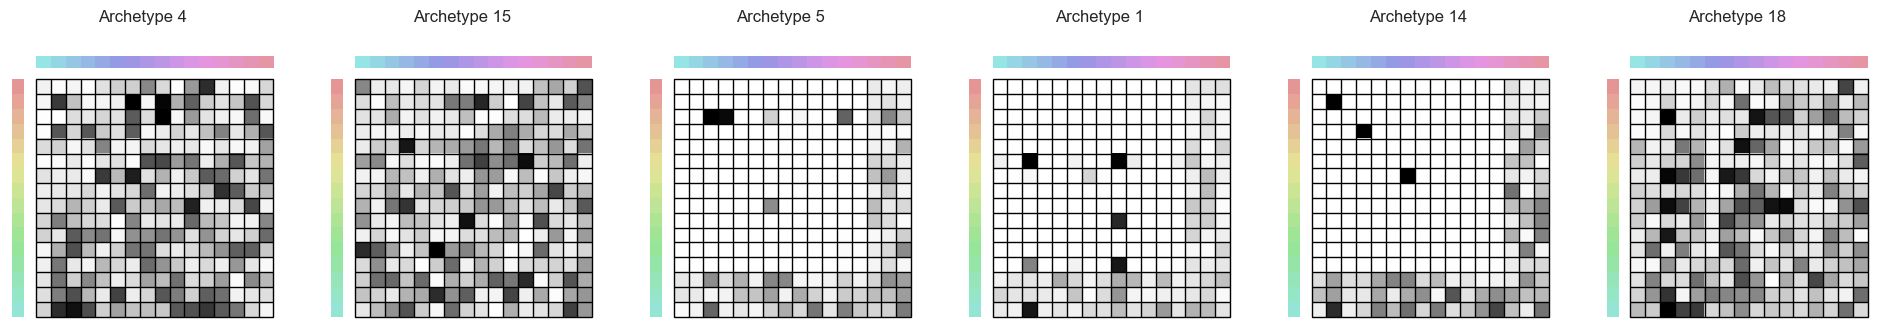

In [164]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))

rand_ind = np.random.choice(21, 6, replace=False)

for i, ax in enumerate(axs.flatten()):
    data_s, info_s = sort_by_archetype_similarity(data[:, :, 0], alphas[:2], estimated_archetypes[:, :, rand_ind[i]])
    heatmap(info_s["archetypes"], labels=[np.arange(na) for na in info_s["n_archetypes"]], ax=ax)
    ax.set_title(f"Archetype {rand_ind[i]}")
# fig.savefig("figures/irmdata/uml/heatmap.png", dpi=300, bbox_inches='tight')

plt.show()